In [1]:
import glob
from image_processing import *

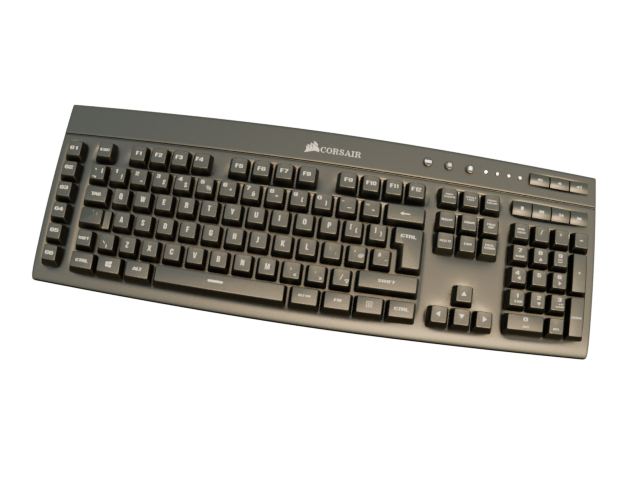

In [93]:
path = random.choice(glob.glob("blender/renders/*"))
image = Image.open(path).convert("RGBA")
image

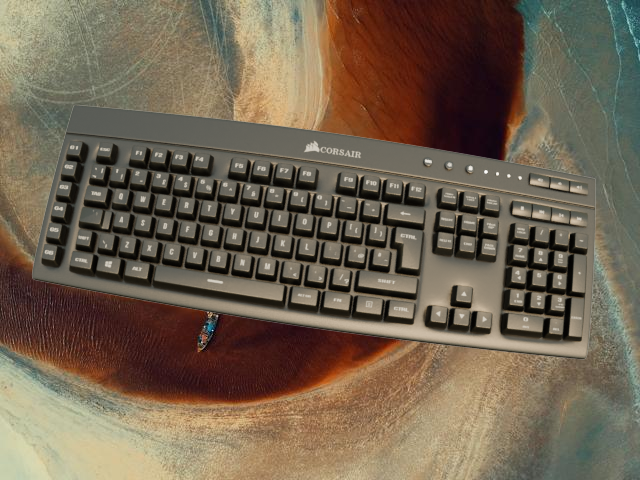

In [96]:
path = random.choice(glob.glob("datasets/bg-20k-resized/*"))
background = Image.open(path)
background = background.resize(image.size)
background = background.convert("RGBA")

background.paste(image, mask=image)
background

253 0
253 0


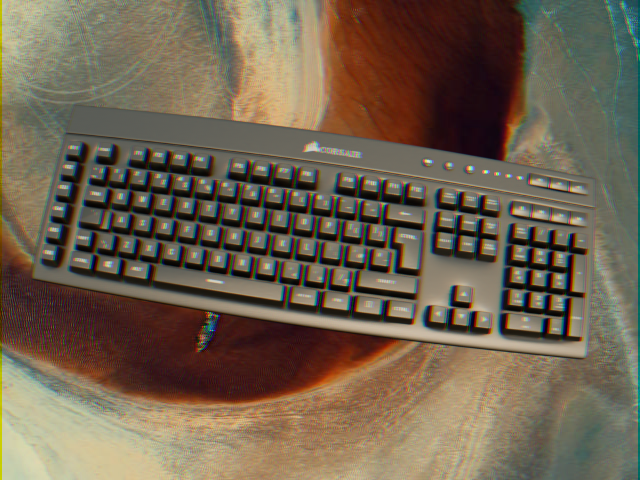

In [131]:
chromatic = add_chromatic_aberration(np.array(background), strength=0.005)
chromatic = Image.fromarray(chromatic)
chromatic

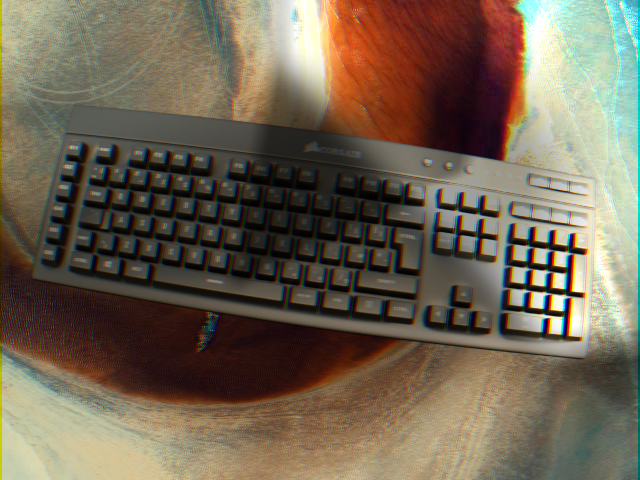

In [134]:
output = chromatic.convert("RGBA")
overlay_funcs = (add_hard_overlay, add_soft_shadow)

n = np.random.geometric(0.5, (1,))[0] - 1
n = 5
for i in range(n):
    overlay_func = random.choice(overlay_funcs)
    output = overlay_func(output)

output

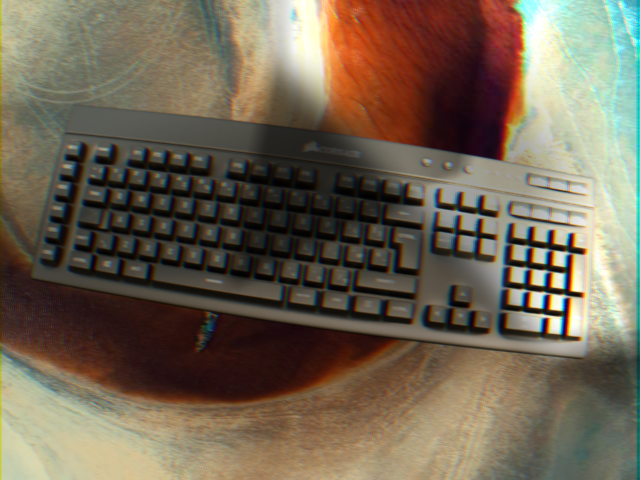

In [135]:
# Greater ksize = more motion blur
# Greater thickness = more gaussian blur

blur_kernel = get_motion_blur_kernel(theta=30, thickness=1, ksize=6)
blurred = cv.filter2D(np.array(output)[:, :, :3], ddepth=-1, kernel=blur_kernel)
Image.fromarray(blurred)

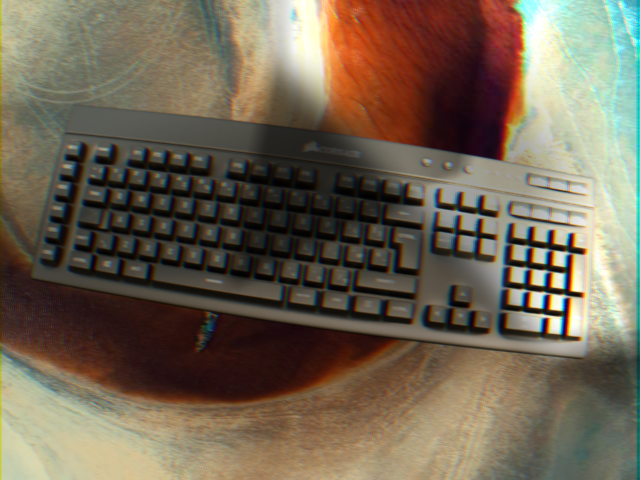

In [144]:
output = Image.fromarray(blurred)

contrast, exposure, sharpness, saturation = np.random.normal(loc=1.0, scale=0.0, size=4)
contrast = max(contrast, 0.5)
exposure = max(exposure, 1)

output = ImageEnhance.Contrast(output).enhance(contrast)
output = ImageEnhance.Brightness(output).enhance(exposure)
output = ImageEnhance.Sharpness(output).enhance(sharpness)
output = ImageEnhance.Color(output).enhance(saturation)
output

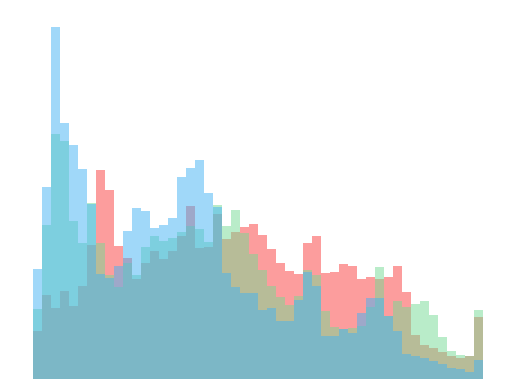

In [145]:
import matplotlib.pyplot as plt

kwargs={"bins": 50, "alpha": 0.5, "histtype": "stepfilled"}

def plot_histogram(ax, data):
    r, g, b = np.array(data).T

    r = r.flatten()
    g = g.flatten()
    b = b.flatten()

    ax.axis("off")
    ax.hist(r, color="#fa3c3c", **kwargs)
    ax.hist(g, color="#74db95", **kwargs)
    ax.hist(b, color="#42b3f5", **kwargs)

plot_histogram(plt.gca(), output)
plt.show()